In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (classification_report, confusion_matrix, accuracy_score ,  ConfusionMatrixDisplay)


In [2]:
# 1. Load the Wine dataset
wine = load_wine()
X = wine.data  # Features
y = wine.target  # Labels
feature_names = wine.feature_names
target_names = wine.target_names


In [3]:
# 2. Explore the dataset
print("=== WINE DATASET ===")
print("Feature names:", feature_names)
print("Target names:", target_names)
print("\nDataset shape:", X.shape)
print("\nFirst 3 samples:")
for i in range(3):
    print(f"Sample {i+1}: {X[i]} → {target_names[y[i]]}")
print(f"\nClass distribution: {np.bincount(y)} samples each")


=== WINE DATASET ===
Feature names: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Target names: ['class_0' 'class_1' 'class_2']

Dataset shape: (178, 13)

First 3 samples:
Sample 1: [1.423e+01 1.710e+00 2.430e+00 1.560e+01 1.270e+02 2.800e+00 3.060e+00
 2.800e-01 2.290e+00 5.640e+00 1.040e+00 3.920e+00 1.065e+03] → class_0
Sample 2: [1.32e+01 1.78e+00 2.14e+00 1.12e+01 1.00e+02 2.65e+00 2.76e+00 2.60e-01
 1.28e+00 4.38e+00 1.05e+00 3.40e+00 1.05e+03] → class_0
Sample 3: [1.316e+01 2.360e+00 2.670e+00 1.860e+01 1.010e+02 2.800e+00 3.240e+00
 3.000e-01 2.810e+00 5.680e+00 1.030e+00 3.170e+00 1.185e+03] → class_0

Class distribution: [59 71 48] samples each


In [5]:
# 3. Preprocess the data
# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=42, stratify=y)

# Standardize features (important for KNN)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [6]:
# 4. Create and train the KNN model
k = 5  # Number of neighbors
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)


KNeighborsClassifier()

In [7]:
# 5. Make predictions
y_pred = knn.predict(X_test)


In [8]:
# 6. Evaluate the model
print("\n=== MODEL EVALUATION ===")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=target_names))

accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.2f}")



=== MODEL EVALUATION ===
Confusion Matrix:
[[18  0  0]
 [ 0 18  3]
 [ 0  0 15]]

Classification Report:
              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        18
     class_1       1.00      0.86      0.92        21
     class_2       0.83      1.00      0.91        15

    accuracy                           0.94        54
   macro avg       0.94      0.95      0.94        54
weighted avg       0.95      0.94      0.94        54


Accuracy: 0.94


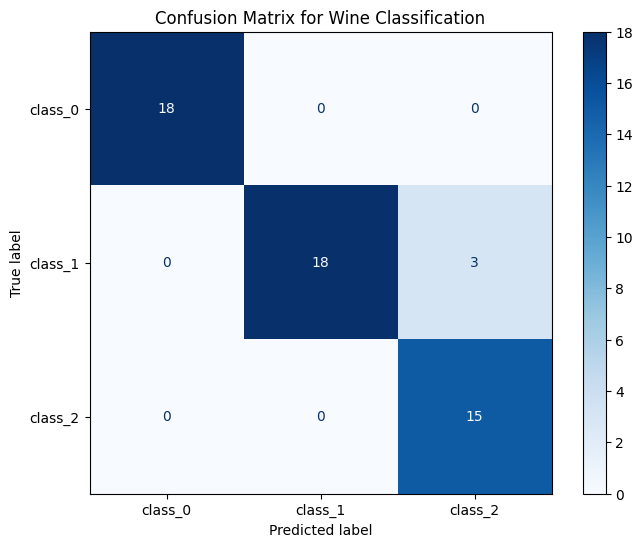

In [9]:
# 7. Plot confusion matrix
fig, ax = plt.subplots(figsize=(8, 6))
ConfusionMatrixDisplay.from_estimator(knn, X_test, y_test,
                                     display_labels=target_names,
                                     cmap=plt.cm.Blues,
                                     ax=ax)
plt.title("Confusion Matrix for Wine Classification")
plt.show()


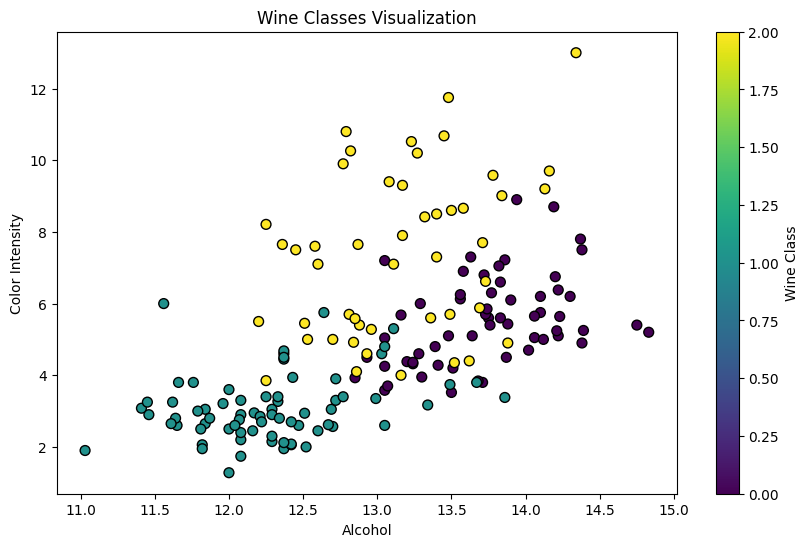

In [10]:
# 8. Visualize feature relationships (using 2 most important features)
# Select two most important features (using mean alcohol and color intensity)
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 9], c=y, cmap='viridis', edgecolor='k', s=50)
plt.xlabel('Alcohol')
plt.ylabel('Color Intensity')
plt.title('Wine Classes Visualization')
plt.colorbar(label='Wine Class')
plt.show()


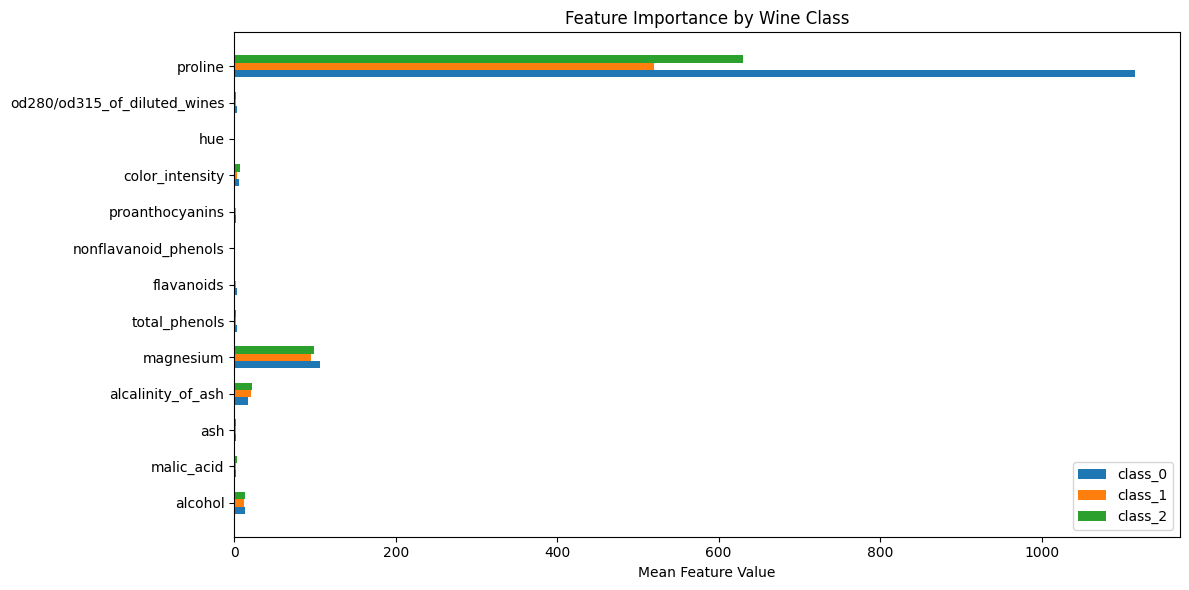

In [11]:
# 9. Feature importance analysis (using mean values per class)
plt.figure(figsize=(12, 6))
mean_features = np.array([X[y == i].mean(axis=0) for i in range(len(target_names))])
plt.barh(range(len(feature_names)), mean_features[0], height=0.2, label=target_names[0])
plt.barh(np.arange(len(feature_names)) + 0.2, mean_features[1], height=0.2, label=target_names[1])
plt.barh(np.arange(len(feature_names)) + 0.4, mean_features[2], height=0.2, label=target_names[2])
plt.yticks(np.arange(len(feature_names)) + 0.2, feature_names)
plt.xlabel('Mean Feature Value')
plt.title('Feature Importance by Wine Class')
plt.legend()
plt.tight_layout()
plt.show()